<a href="https://colab.research.google.com/github/Wilda1802/H8_Batch_5/blob/main/9YUhhhhBismillah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT PUSTAKA

In [ ]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
import tensorflow as tf
tf.random.set_seed(0)
np.random.seed(0)

#LOAD DATA

In [ ]:
#Load data
df=pd.read_excel('/content/BALI2.xlsx')

#CHEKING MISSING VALUE & DUPLICATE VALUE

In [ ]:
# Checking missing value
df.isna().sum()

,0
Tahun,0
Kunjungan,0


In [ ]:
# Checking duplicated value
df.duplicated().sum()

0

In [ ]:
df.describe()

,Tahun,Kunjungan
count,120,1.200000e+02
mean,2018-12-16 04:00:00,6.504365e+05
min,2014-01-01 00:00:00,1.019480e+05
25%,2016-06-23 12:00:00,5.165880e+05
50%,2018-12-16 12:00:00,6.596425e+05
75%,2021-06-08 12:00:00,7.926720e+05
max,2023-12-01 00:00:00,1.287877e+06
std,NaN,2.349521e+05


#OUTLIER

<Axes: ylabel='Kunjungan'>

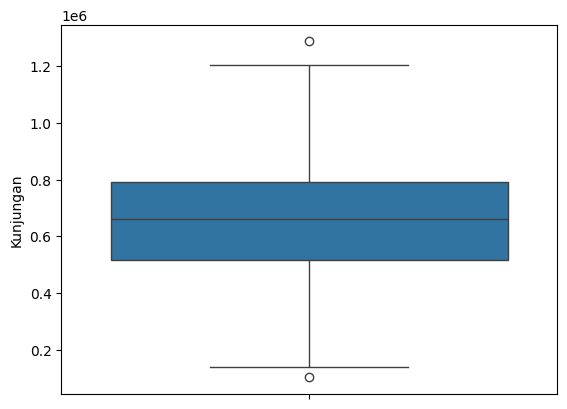

In [ ]:
# Checking outlier dengan boxplot
sns.boxplot(df['Kunjungan'])

In [ ]:
#IQR
Q1 = np.percentile(df['Kunjungan'], 25, method='midpoint')
Q3 = np.percentile(df['Kunjungan'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

277281.0


In [ ]:
# Menentukan batas atas dan batas bawah
# Above Upper bound
upper = Q3+1.5*IQR
upper_array = np.array(df['Kunjungan']>= upper)

# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(df['Kunjungan'] <= lower)

print("Upper Bound:", upper)
print(upper_array.sum())
print("Lower Bound:", lower)
print(lower_array.sum())

Upper Bound: 1208878.5
1
Lower Bound: 99754.5
0


In [ ]:
# Menemukan letak outlier
df.loc[(df['Kunjungan'] > upper) | (df['Kunjungan'] < lower)]

,Tahun,Kunjungan
65,2019-06-01,1287877


In [ ]:
# Membuat array untuk mengindikasi letak outlier
upper_array = np.where(df['Kunjungan'] >= upper)[0]
lower_array = np.where(df['Kunjungan'] <= lower)[0]

In [ ]:
#Menghapus outlier
df1=df.loc[(df['Kunjungan']<upper) & (df['Kunjungan']>lower)]
print('before removing outlier:', len(df))
print('after removing outlier:', len(df1))
print('outliers:', len(df)-len(df1))

before removing outlier: 120
after removing outlier: 119
outliers: 1


In [ ]:
df1.shape

(119, 2)

In [ ]:
#capping - mengubah outlier ke batas atas/batas bawah
df1=df.copy()
df1.loc[(df1['Kunjungan']> upper), 'Kunjungan'] = upper
df1.loc[(df1['Kunjungan']<lower), 'Kunjungan'] = lower
len(df1)

<ipython-input-957-2cace6cb1599>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1208878.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.loc[(df1['Kunjungan']> upper), 'Kunjungan'] = upper


120

In [ ]:
df1.shape

(120, 2)

<Axes: ylabel='Kunjungan'>

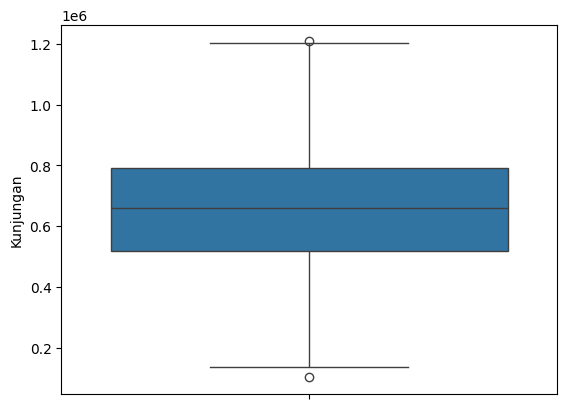

In [ ]:
sns.boxplot(df1['Kunjungan'])

In [ ]:
# Mengubah kolom tanggal menjadi indeks
df1.set_index('Tahun', inplace=True)
df1.head()

,Kunjungan
Tahun,
2014-01-01,517500.0
2014-02-01,296581.0
2014-03-01,255403.0
2014-04-01,318800.0
2014-05-01,385366.0


<Axes: xlabel='Tahun'>

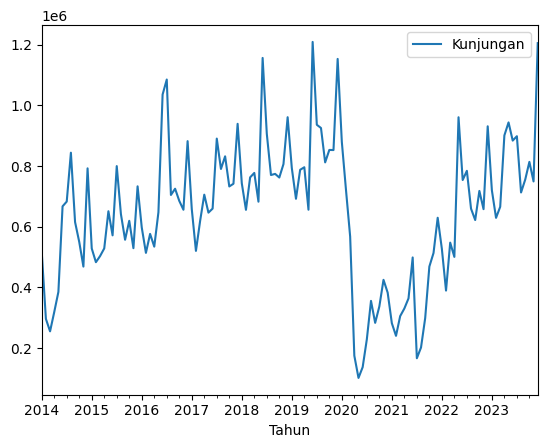

In [ ]:
# Visualisasi data menggunakan lineplot
df1.plot()

In [ ]:
df1

,Kunjungan
Tahun,
2014-01-01,517500.0
2014-02-01,296581.0
2014-03-01,255403.0
2014-04-01,318800.0
2014-05-01,385366.0
2014-06-01,667201.0
2014-07-01,682941.0
2014-08-01,843958.0
2014-09-01,615429.0


#NORMALISASI DATA

In [ ]:
#Normalisasi data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df1.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=list(df1.columns))

target_scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled[['Kunjungan']] = target_scaler.fit_transform(df1[['Kunjungan']].to_numpy())
df_scaled = df_scaled.astype(float)
df_scaled

,Kunjungan
0,0.375409
1,0.175831
2,0.138631
3,0.195904
4,0.256040
5,0.510649
6,0.524869
7,0.670331
8,0.463878
9,0.404768


In [ ]:
df_scaled.shape

(120, 1)

#SLIDDING WINDOWS

In [ ]:
# Mendeklarasikan Slidding Windows
def create_dataset(df_scaled, window_size):
  df_as_np = df_scaled.to_numpy()
  X = []
  Y = []
  for i in range(len(df_as_np)-window_size-1):
    a=df_as_np[i:(i++window_size),0]
    X.append(a)
    Y.append(df_as_np[i+window_size,0])

  return np.array(X), np.array(Y)

In [ ]:
window_size = 12
X, Y = create_dataset(df_scaled, window_size)
X.shape, Y.shape

((107, 12), (107,))

#SPLITTING DATA

In [ ]:
# Membagi data menjadi data latih dan data uji
train_size = int(len(X) * 0.89)
test_size = len(X)-train_size

X_train,  X_test = X[:train_size], X[train_size:]
y_train,  y_test = y[:train_size], y[train_size:]

print("Train data size: ", X_train.shape, y_train.shape)
print("Test data size: ", X_test.shape, y_test.shape)

Train data size:  (95, 12) (95,)
Test data size:  (12, 12) (12,)


In [ ]:
# Mengubah variabel X dalam 3D  [samples, time steps, features]
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test1 = X_test.reshape((X_test .shape[0], X_test.shape[1], 1))

print("X Train data size: ", X_train1.shape)
print("X Test data size: ", X_test1.shape)

X Train data size:  (95, 12, 1)
X Test data size:  (12, 12, 1)


#BUILD MODEL

In [ ]:
from tensorflow.keras.regularizers import l2,l1

In [ ]:
# Membangun dan mengkompilasi model LSTM
model_lstm = Sequential()

#Input Layer
model_lstm.add((LSTM(84,  input_shape=((120, 1)))))
model_lstm.add(Dropout(0.5))

#Hidden layer
model_lstm.add(Dense(96, 'relu', kernel_regularizer=l2(0.05)))
model_lstm.add(Dropout(0.5))

#Output Layer
model_lstm.add(Dense(1,'tanh'))

# Mengkompilasi Model LSTM
cp1 = ModelCheckpoint('model.keras', save_best_only=True)
model_lstm.compile(loss='MeanSquaredError', optimizer=Adam(learning_rate=0.004))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#TRAINING MODEL

In [ ]:
# Melatih model
MODEL=model_lstm.fit(X_train1,y_train,
                validation_data=(X_test1, y_test),
                epochs=100,
                batch_size=20,
                verbose=1,
                callbacks=[cp1]
                )
MODEL

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 4.3585 - val_loss: 3.2546
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.0597 - val_loss: 2.2714
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.0827 - val_loss: 1.5059
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.3753 - val_loss: 0.9496
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.8899 - val_loss: 0.5979
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5426 - val_loss: 0.3685
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3256 - val_loss: 0.2007
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1984 - val_loss: 0.1206
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1224 - val_loss: 0.0793
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0781 - val_loss: 0.0446
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0571 - val_loss: 0.0360
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0490 - val_lo

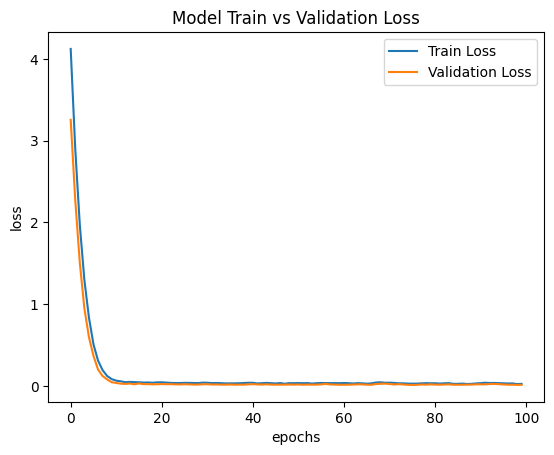

FinalvalidationMSE= 0.012908305041491985


In [ ]:
# Visualisasi grafik train dan loss validation
plt.plot(MODEL.history['loss'], label='Train Loss')
plt.plot(MODEL.history['val_loss'], label='Validation Loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model Train vs Validation Loss')
plt.legend()
plt.show()

val_mse=MODEL.history['val_loss'][-1]
print('FinalvalidationMSE=', val_mse)


In [ ]:
 # Membuat peramalan
train_Predict = model_lstm.predict(X_train1)
test_Predict = model_lstm.predict(X_test1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [ ]:
# Denormalisasi data peramalan dan data sebenarnya
testPredict = scaler.inverse_transform(test_Predict.reshape(-1,1)).flatten()
testY = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

testPredict.shape, testY.shape
TEST=pd.DataFrame(data={'Pred':testPredict, "Act":testY})
TEST

,Pred,Act
0,672502.5000,930917.0
1,616662.1250,720164.0
2,597679.3125,629282.0
3,725136.1250,665751.0
4,799089.3750,900880.0
5,902372.1250,943713.0
6,862575.0000,883793.0
7,857246.7500,898260.0
8,826108.6250,712860.0
9,813848.4375,755293.0


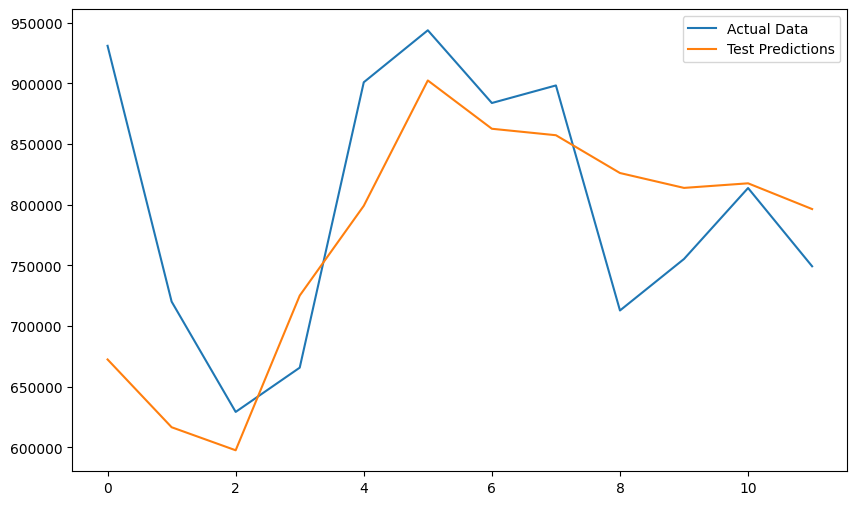

In [ ]:
# Visualisasi hasil prediksi pada data uji
plt.figure(figsize=(10, 6))
plt.plot(testY, label='Actual Data')
plt.plot(testPredict, label='Test Predictions')
plt.legend()
plt.show()

In [ ]:
# Menghitung MAPE
def mean_absolute_percentage_error(testY, testPredict):
  testY, testPredict = np.array(testY), np.array(testPredict)
  return np.mean(np.abs((testY- testPredict)/ testY))*100

mape1 = mean_absolute_percentage_error(testY, testPredict)
print(f"MAPE: {mape1:.2f}%")

MAPE: 9.09%


In [ ]:
trainPredict = scaler.inverse_transform(train_Predict).flatten()
trainY = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()

TRAIN=pd.DataFrame(data={'Pred':trainPredict, "Act":trainY})
TRAIN

,Pred,Act
0,666244.37500,528506.0
1,580852.68750,483221.0
2,496598.31250,503311.0
3,468753.43750,528668.0
4,568850.12500,651089.0
5,725085.50000,571646.0
6,768536.56250,799765.0
7,818434.50000,641684.0
8,768368.56250,557081.0
9,753438.43750,619599.0


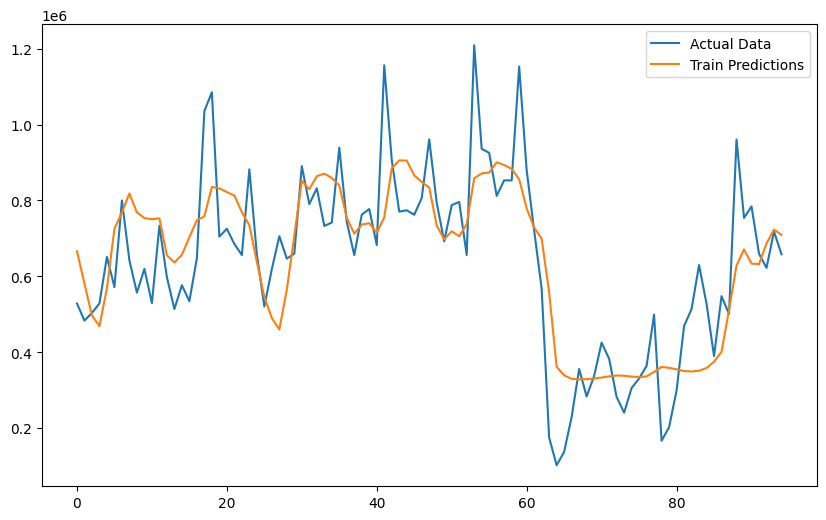

In [ ]:
# Visualisasi hasil prediksi pada data pelatihan
plt.figure(figsize=(10, 6))
plt.plot(trainY, label='Actual Data')
plt.plot(trainPredict, label='Train Predictions')
plt.legend()
plt.show()

In [ ]:
# Menghitung MAPE
def mean_absolute_percentage_error(trainY, trainPredict):
  trainY, trainPredict = np.array(trainY), np.array(trainPredict)
  return np.mean(np.abs((trainY- trainPredict)/ trainY))*100

mape2= mean_absolute_percentage_error(trainY, trainPredict)
print(f"MAPE2: {mape2:.2f}%")

MAPE2: 23.08%


In [ ]:
# Membuat prediksi untuk 12 bulan ke depan
future_predictions = []

# Mengambil data 12 bulan terakhir dari dataset asli
current_input = df_scaled[-window_size:].values.reshape(1, window_size, 1)

for _ in range(60):
    future_pred = model_lstm.predict(current_input).flatten()
    future_predictions.append(future_pred[0])

    # Tambahkan prediksi baru ke input dan hapus nilai pertama
    current_input = np.append(current_input[:, 1:, :], [[future_pred]], axis=1)

# Mengembalikan prediksi ke skala asli
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Mencetak prediksi
for i, prediction in enumerate(future_predictions):
    print(f"Prediction for month {i+1}: {prediction[0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

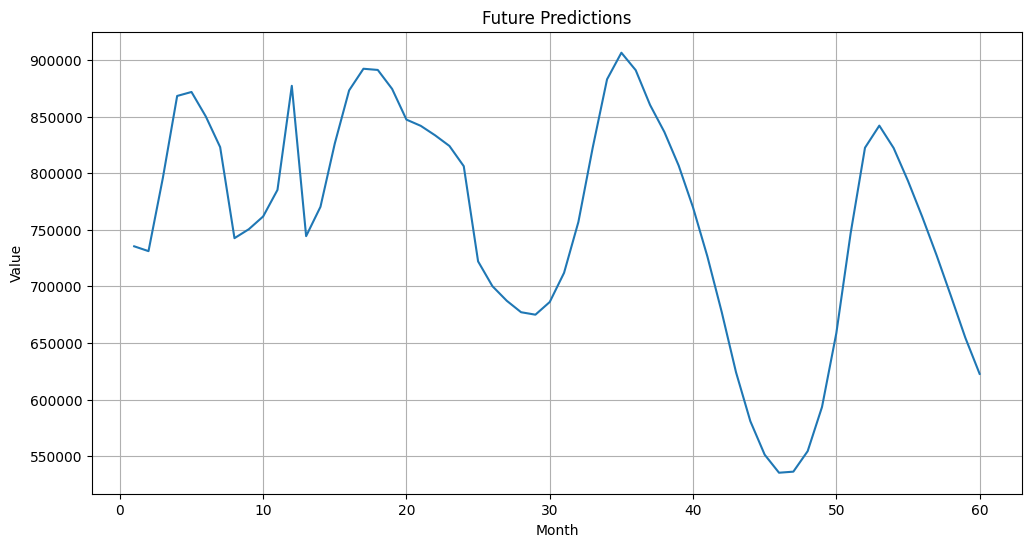

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the time range for the predictions
time_range = np.arange(1, 61)

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(time_range, future_predictions)
plt.xlabel("Month")
plt.ylabel("Value")
plt.title("Future Predictions")
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_lstm(testY, testPredict):
    mse = mean_squared_error(testY, testPredict)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(testY, testPredict)
    r2 = r2_score(testY, testPredict)

    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

In [ ]:
# Evaluasi model LSTM
metrics = evaluate_lstm(testY, testPredict)
print(metrics)

{'MSE': 9559205693.393229, 'RMSE': 97771.19050821273, 'MAE': 73424.76041666667, 'R2': 0.1212649162134023}


In [ ]:
pd.set_option('display.max_rows',120)
print(df_scaled)

     Kunjungan
0     0.375409
1     0.175831
2     0.138631
3     0.195904
4     0.256040
5     0.510649
6     0.524869
7     0.670331
8     0.463878
9     0.404768
10    0.331362
11    0.623742
12    0.385352
13    0.344442
14    0.362591
15    0.385498
16    0.496093
17    0.424325
18    0.630407
19    0.487597
20    0.411167
21    0.467645
22    0.386143
23    0.570226
24    0.447734
25    0.372114
26    0.428654
27    0.390672
28    0.493113
29    0.843427
30    0.888043
31    0.544491
32    0.563081
33    0.526949
34    0.500496
35    0.704722
36    0.502615
37    0.378085
38    0.466954
39    0.545438
40    0.491918
41    0.503889
42    0.712258
43    0.621877
44    0.659552
45    0.569839
46    0.577905
47    0.756235
48    0.579538
49    0.500276
50    0.596852
51    0.610101
52    0.524489
53    0.952366
54    0.726693
55    0.603846
56    0.607261
57    0.596402
58    0.636399
59    0.775939
60    0.624772
61    0.533155
62    0.619432
63    0.627003
64    0.500604
65    1.00